# Week 8: Statistics and Sampling Distributions (Interactive Lab)
Welcome! In this notebook, you'll explore how sample statistics behave when we repeatedly draw samples from a population.

We'll cover:
- Sampling distributions
- Central Limit Theorem (CLT)
- Sampling distributions of means and proportions
- Common inference distributions (t, χ², F)

Answer the **concept questions** as Markdown text, and complete each **code cell** to run the simulations.


## Quick Concept Check 💡
### 1. What’s the difference between a *statistic* and a *parameter*?
- ##### Statistic: a numerical quantity computed from sample data
- ##### Parameter: characteristic/measure (mean, median, max, min, variance) obtained from a population
### 2. Why is the sample mean a random variable?
- ##### the value depends on the random sample drawn from the population
### 3. What is the Central Limit Theorem (in one sentence)?
- ##### the average of the sample means will get closer to the population mean as the sample size grows (n increases)

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

### Sampling Distribution Simulation

Population mean = 70.44, Population std = 21.66


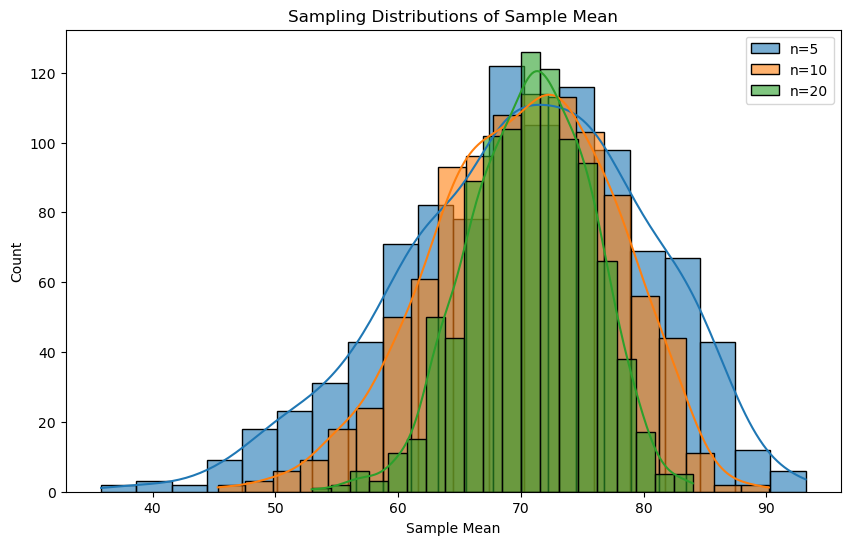

In [3]:
population = np.array([81, 75, 29, 94, 65, 91, 74, 82, 78, 35, 43, 86, 78, 61, 83, 99, 40, 87, 93, 44, 81, 65, 68, 90, 76, 16, 88])
mu, sigma = population.mean(), population.std()
print(f'Population mean = {mu:.2f}, Population std = {sigma:.2f}')

sample_sizes = [5, 10, 20]
plt.figure(figsize=(10,6))
for n in sample_sizes:
    means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(1000)]
    sns.histplot(means, kde=True, label=f'n={n}', bins=20, alpha=0.6)
plt.title('Sampling Distributions of Sample Mean')
plt.xlabel('Sample Mean')
plt.legend()
plt.show()

The following code shows how to claculate the mean of the means when you are sampling from the above population N (we did 10000 above) times with a sample size n (we used 5, 10, and 20 above). Change N and n and see how those means are changing. 
#### Question 1: Answer the first quiz question in blackboard accordingly.

In [27]:
np.random.seed(42)
N=1000
n=15
means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(N)]
np.mean(means)

70.1632

In the following similarly, you can check the standard deviation of these means. You know theoretically what it should be!

In [7]:
np.random.seed(42)
N=100
n=5
means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(N)]
np.std(means)

10.495653195490029

#### Question 2 🔍
- As the sample size increases, what happens to the variability of the sample mean?


ANSWER: Decreases

### Central Limit Theorem in Action

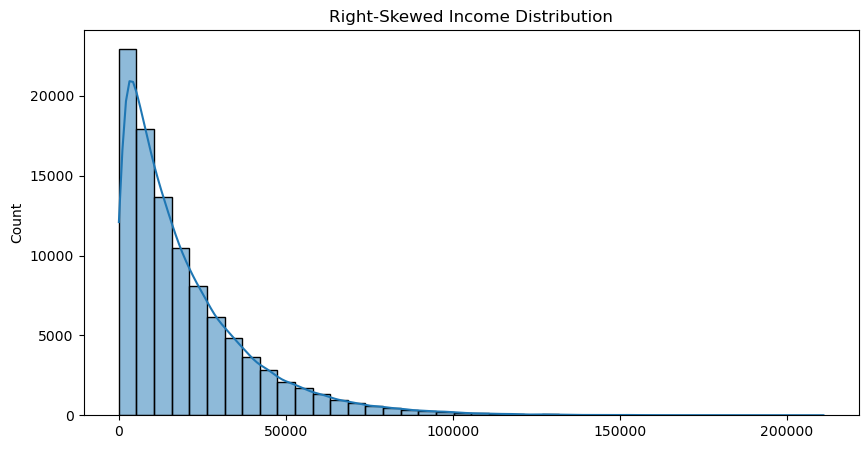

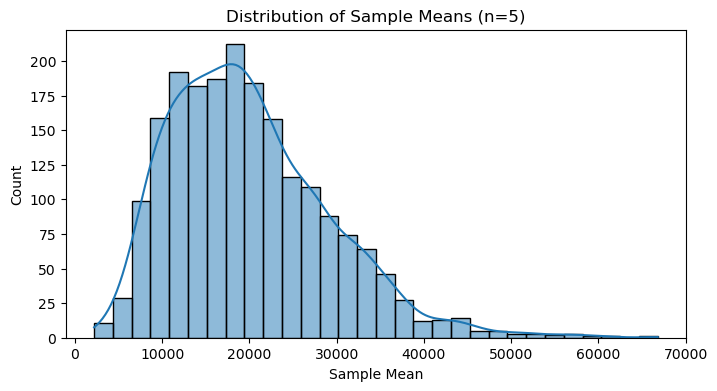

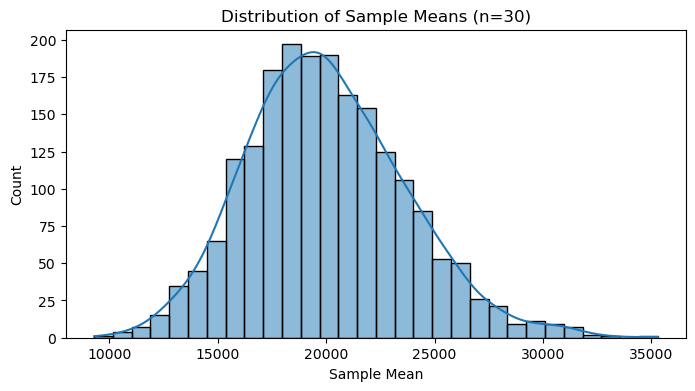

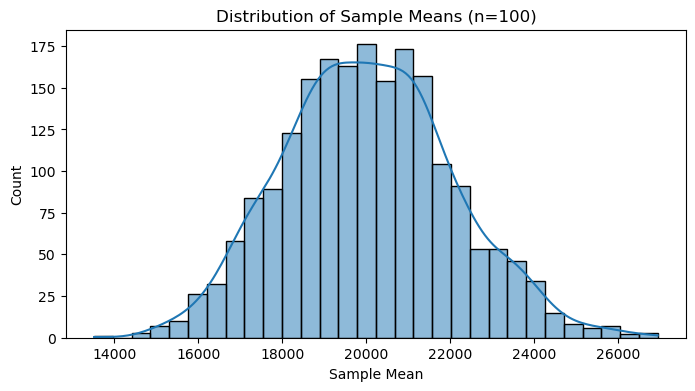

In [9]:
incomes = np.random.exponential(scale=20000, size=100000)
plt.figure(figsize=(10,5))
sns.histplot(incomes, bins=40, kde=True)
plt.title('Right-Skewed Income Distribution')
plt.show()
np.random.seed(42)
for n in [5, 30, 100]:
    sample_means = [np.mean(np.random.choice(incomes, n)) for _ in range(2000)]
    plt.figure(figsize=(8,4))
    sns.histplot(sample_means, bins=30, kde=True)
    plt.title(f'Distribution of Sample Means (n={n})')
    plt.xlabel('Sample Mean')
    plt.show()

#### Question 3 What does the CLT tell us about the distribution of sample means?

ANSWER: When n is large, it becomes the normal distribution

##### How large does n need to be for this approximation to hold? Change n and see approximately when it is becoming normal?

N=30

### Sampling Distribution of a Proportion

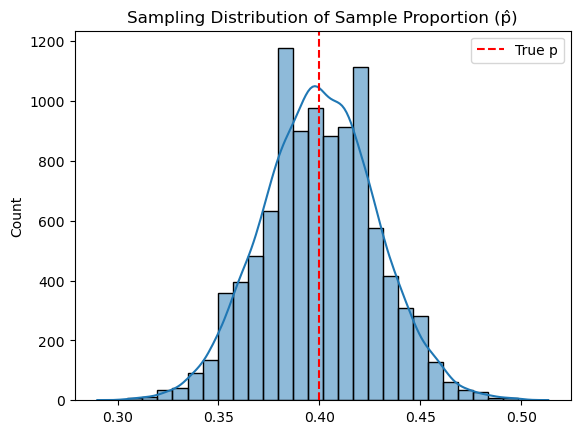

Empirical P(p̂ < 0.35) = 0.0322
Theoretical P(p̂ < 0.35) = 0.0385


In [11]:
np.random.seed(42)
from scipy.stats import norm
p_true = 0.4
n = 300
trials = 10000
samples = np.random.binomial(n, p_true, trials)
p_hats = samples / n
sns.histplot(p_hats, bins=30, kde=True)
plt.axvline(p_true, color='red', linestyle='--', label='True p')
plt.title('Sampling Distribution of Sample Proportion (p̂)')
plt.legend()
plt.show()
prob_empirical = np.mean(p_hats < 0.35)
print(f'Empirical P(p̂ < 0.35) = {prob_empirical:.4f}')
sigma_p = np.sqrt(p_true*(1-p_true)/n)
z = (0.35 - p_true)/sigma_p
prob_theoretical = norm.cdf(z)
print(f'Theoretical P(p̂ < 0.35) = {prob_theoretical:.4f}')

#### Question 5: What conditions must be met for this approximation to hold?

The normal approximation for p(^) is valid when: np>= 10 and n(1-p)>=10

#### Question 6: In your own words, explain why the Central Limit Theorem is important for statistical inference.

Allows researchers to make reliable conclusions about a population based on sample data, even when the population distribution is unknown or not normal

### Check Your Understanding 🧠
- Why can we use a normal approximation for the sampling distribution of p̂ here?

In the following code, let`s play with sizes (also answer 
#### Question 7 by changing the numbers for n and p (from the above code), what was the empirical probability that the sample proportion p(^)<0.25?

In [76]:
p_true = 0.3
n = 200
trials = 10000
samples = np.random.binomial(n, p_true, trials) #sampling from a binomial distrbution with number of trials n, and probability of succsess is p_true and we are doing this trials many times
p_hats = samples / n
print("Empirical probability =", np.mean(p_hats))

Empirical probability = 0.299583


### Common Distributions in Statistical Inference

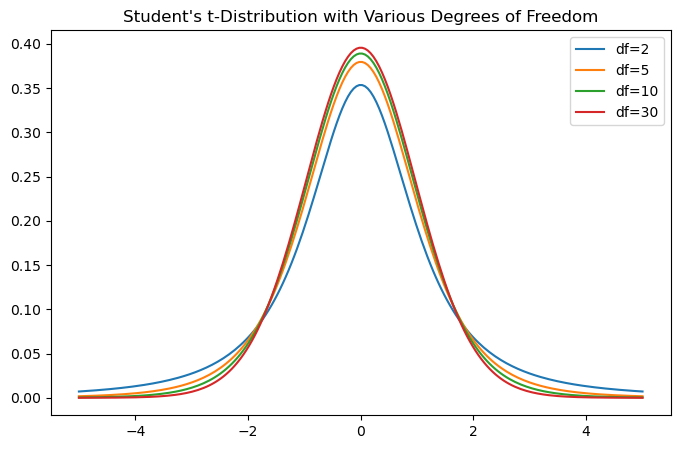

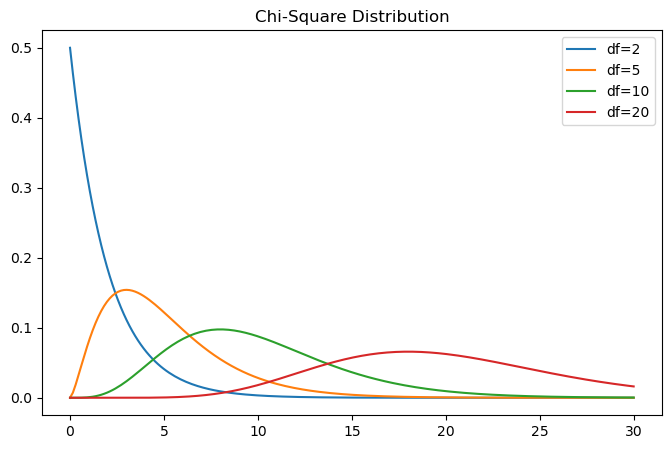

In [19]:
from scipy.stats import t, chi2, f
x = np.linspace(-5,5,200)
plt.figure(figsize=(8,5))
for df in [2, 5, 10, 30]:
    plt.plot(x, t.pdf(x, df), label=f'df={df}')
plt.title("Student's t-Distribution with Various Degrees of Freedom")
plt.legend()
plt.show()

x = np.linspace(0, 30, 200)
plt.figure(figsize=(8,5))
for df in [2, 5, 10, 20]:
    plt.plot(x, chi2.pdf(x, df), label=f'df={df}')
plt.title('Chi-Square Distribution')
plt.legend()
plt.show()

#### Question 8:  When do we use a t-distribution instead of a normal distribution?

When the population standard deviation is unknown and the sample size is small

#### Question 9: What does the χ² distribution represent?

It's skewed right, used for variance and independence tests

#### Question 10: How is the F-distribution used in ANOVA or regression?

ANOVA (analysis of variance)  and comparing variances

### Reflection 💭
#### - In your own words, explain how sampling variability influences statistical inference.
Sampling variability influences statistical inference by introducing natural variation in sample statistics, which must be accounted for when estimating population parameters, constructing confidence intervals, and determining the significance of results, as larger sample sizes reduce this variability and lead to more precise and reliable inferences.
#### - Which concept (sampling means, CLT, or proportions) felt most intuitive or surprising?
The lead-in from sampling means to connect with Central Limit Theorem. It makes sense that CLT relies on sample means to add to sample size in order to work it's average closer to the population mean.

##### ✅ Well done! You’ve completed the Week 8 Interactive Lab.